**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Import data

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "fcc_astarr_macs_input_overlap", "summary")
txt_fname = "region.summary.encode_e2g_benchmark.regulated.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_annot = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 3035    6


Chrom,ChromStart,ChromEnd,Region,Regulated_Ifany,Regulated_Count
chr1,3774056,3776283,chr1:3774056-3776283,TRUE,3
chr1,3803955,3806146,chr1:3803955-3806146,FALSE,0
chr1,4126841,4128109,chr1:4126841-4128109,FALSE,0


In [5]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, "summary")
txt_fname  = "result.coverage.zscore.final.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_region_score = dat

print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [6]:
dat = dplyr::left_join(
    dat_region_score,
    dat_region_annot,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)

dat_region_merge = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,Regulated_Ifany,Regulated_Count
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,NA,NA
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,NA,NA
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,NA,NA
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,NA,NA
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,NA,NA


In [7]:
dat = dat_region_merge
dat = dat %>% na.omit
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,Regulated_Ifany,Regulated_Count
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4144721,4147004,chr11:4144721-4147004,-0.2882554,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4181745,4182535,chr11:4181745-4182535,-0.2626761,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4194886,4195204,chr11:4194886-4195204,-0.3590306,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4492759,4493676,chr11:4492759-4493676,-0.4302453,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0
chr11,4626130,4626649,chr11:4626130-4626649,-0.1393248,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,FALSE,0


In [8]:
table(dat$Assay_Type)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
          3035           2856            170           2612             52 
        WSTARR 
          3009 

In [9]:
table(dat$Assay_Group)


   ASTARR_KS91 CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
          3035           2856            170           2612             52 
        WSTARR 
          3009 

In [10]:
table(dat$Assay_Label)


          ATAC-STARR       CRISPRi-Growth CRISPRi-HCR FlowFISH 
                3035                 2856                  170 
          Lenti-MPRA          Tiling-MPRA            WHG-STARR 
                2612                   52                 3009 

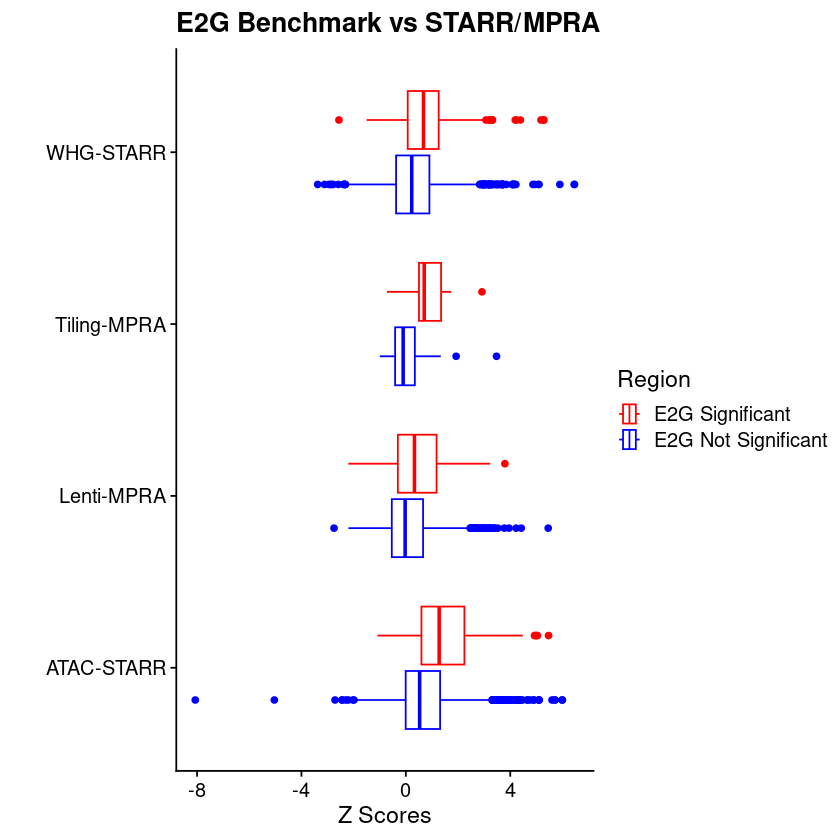

In [17]:
vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA")
dat = dat_region_merge
dat = dat %>% na.omit
dat = dat %>% dplyr::filter(Assay_Type %in% vec)
dat = dat %>% dplyr::mutate(Region = ifelse(Regulated_Ifany, "E2G Significant", "E2G Not Significant"))
dat_region_arrange = dat

theme_color = scale_color_manual(
    breaks = c("E2G Significant", "E2G Not Significant"),
    values=c("red", "blue")
)

gpt = ggplot(dat, aes(y=Assay_Label, x=Score, color = Region)) +
    geom_boxplot() +
    theme_cowplot() +
    theme_color +
    labs(x = "Z Scores", y = "", title = "E2G Benchmark vs STARR/MPRA")

ggsave("fig.fcc_score.e2g_regulated.pdf", gpt, width = 6, height = 7)
print(gpt)

In [30]:
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label,Regulated_Ifany,Regulated_Count
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>
chr1,3774056,3776283,E2G Significant,-1.38588780,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,TRUE,3
chr1,3803955,3806146,E2G Not Significant,-0.52772388,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,FALSE,0
chr1,4126841,4128109,E2G Not Significant,-0.72655396,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,FALSE,0
chr1,5304733,5305546,E2G Not Significant,0.58740043,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,FALSE,0
chr1,8197576,8198589,E2G Not Significant,0.25799537,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,FALSE,0
chr1,8857787,8858608,E2G Significant,-0.03056138,MPRA_Lenti_K562_Nadav_Vikram,LMPRA,LMPRA,Lenti-MPRA,TRUE,1


In [31]:
dat = dat_region_arrange
lst = split(dat, dat$Assay_Type)
dat = lst[[1]]
wilcox.test(dat$Score~dat$Region)


	Wilcoxon rank sum test with continuity correction

data:  dat$Score by dat$Region
W = 296868, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [40]:
dat = dat_region_arrange
lst = split(dat, dat$Assay_Type)
lst = lapply(lst, function(dat){
    fit = wilcox.test(dat$Score~dat$Region)
    return(fit)
})

lst_fit_wilcoxon = lst

In [53]:
lst = lst_fit_wilcoxon
lst = lapply(lst, function(fit){
    res = c(fit$statistic, fit$p.value)
    names(res) = c("Statistic", "PValue")
    return(res)
})
dat = bind_rows(lst, .id = "Assay")
dat = dat %>% dplyr::mutate(MinusLog10PValue = -log10(PValue))
dat_region_stats = dat
dat

Assay,Statistic,PValue,MinusLog10PValue
<chr>,<dbl>,<dbl>,<dbl>
ASTARR,296868.0,2.778212e-32,31.556235
LMPRA,283692.5,7.733812e-10,9.111606
TMPRA,89.0,1.010852e-02,1.995312
WSTARR,361857.0,2.823454e-13,12.549219


In [54]:
res = lst[[1]]
res$statistic
res$p.value

ERROR: Error in res$statistic: $ operator is invalid for atomic vectors


In [55]:
dat = dat_region_arrange
lst = split(dat, dat$Assay_Type)
lst = lapply(lst, function(dat){
    res = nrow(dat)
    names(res) = "Coverage"
    return(res)
})
dat = bind_rows(lst, .id = "Assay")
dat_region_count = dat
dat

Assay,Coverage
<chr>,<int>
ASTARR,3035
LMPRA,2612
TMPRA,52
WSTARR,3009


In [57]:
dat = dplyr::left_join(dat_region_stats, dat_region_count, by = "Assay")
fun_display_table(dat)

Assay,Statistic,PValue,MinusLog10PValue,Coverage
ASTARR,296868.0,0.0000000,31.556235,3035
LMPRA,283692.5,0.0000000,9.111606,2612
TMPRA,89.0,0.0101085,1.995313,52
WSTARR,361857.0,0.0000000,12.549219,3009
